In [5]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
ipl = pd.read_csv('./ipl_2015_2016.csv')

In [7]:
ipl.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [8]:
#dropping columns taht are not required, do not impact
#on the predicted outcomes

ipl.drop(['inning', 'fielder','non_striker', 'is_super_over'], 1, inplace=True)

In [9]:
# changing following t floats for ease of calculations in ML
ipl['total_runs'] = ipl.total_runs.astype(float)
ipl['ball'] = ipl.ball.astype(float)
ipl['over'] = ipl.over.astype(float)

In [10]:
# check that changes have been made
ipl.dtypes

match_id              int64
batting_team         object
bowling_team         object
over                float64
ball                float64
batsman              object
bowler               object
total_runs          float64
player_dismissed     object
dismissal_kind       object
dtype: object

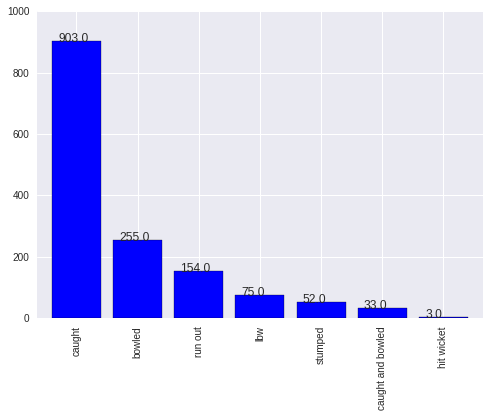

In [11]:
#we are attempting to predict outcomes so we will look at the way wickets fall

dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=ipl[ipl["dismissal_kind"].isin(dismiss)]
ax=ct.dismissal_kind.value_counts()[:10].plot.bar(width=0.8,color='B')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

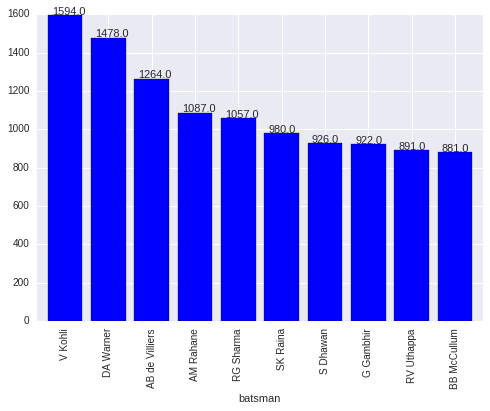

In [12]:
max_runs=ipl.groupby(['batsman'])['total_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color='b')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=11)
plt.show()

In [13]:
kohli=ipl[ipl['batsman']=='V Kohli']
kohli=kohli[kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
kohli=kohli.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
kohli['batsman']='V Kohli'

raina=ipl[ipl['batsman']=='SK Raina']
raina=raina[raina['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
raina=raina.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
raina['batsman']='SK Raina'

abd=ipl[ipl['batsman']=='AB de Villiers']
abd=abd[abd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
abd=abd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
abd['batsman']='AB de Villiers'

msd=ipl[ipl['batsman']=='MS Dhoni']
msd=msd[msd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
msd=msd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
msd['batsman']='MS Dhoni'

uthapa=ipl[ipl['batsman']=='RV Uthappa']
uthapa=uthapa[uthapa['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
uthapa=uthapa.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
uthapa['batsman']='RV Uthappa'

dhawan=ipl[ipl['batsman']=='S Dhawan']
dhawan=dhawan[dhawan['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
dhawan=dhawan.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
dhawan['batsman']='S Dhawan'

warn=ipl[ipl['batsman']=='DA Warner']
warn=warn[warn['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
warn=warn.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
warn['batsman']='DA Warner'

new = kohli.append([raina,abd,msd,uthapa,dhawan,warn])
new = new[['batsman','bowler','dismissal_kind']]
new.columns=['batsman','bowler','No_of_Dismissals']
new


,batsman,bowler,No_of_Dismissals
0,V Kohli,A Nehra,3
0,SK Raina,CH Morris,3
0,AB de Villiers,A Nehra,2
0,MS Dhoni,HV Patel,2
0,RV Uthappa,Harbhajan Singh,2
0,S Dhawan,M Morkel,2
0,DA Warner,UT Yadav,2


In [14]:
eco=ipl.groupby(['bowler']).sum()

eco['economy']=(eco['total_runs']/(eco['over']))
eco[(eco['over']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,Mustafizur Rahman,A Zampa,DJ Bravo,CH Gayle,JW Hastings,RS Bopara,A Ashish Reddy,SP Narine,A Mishra,M de Lange
economy,0.0867886,0.0899308,0.0903695,0.0973558,0.100817,0.105196,0.106808,0.107336,0.107625,0.107692


In [21]:
#print(ipl['bowler'].value_counts().sort_values(ascending=False))

In [18]:
X = ipl.iloc[:,1:].values
y = ipl.iloc[:,0].values

In [46]:
ipl_dummies = pd.get_dummies(ipl, columns = ['batting_team', 'bowling_team', 'batsman', 'bowler', 'dismissal_kind', 'player_dismissed'])

In [87]:
ipl_dummies.head()

,match_id,over,ball,total_runs,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,player_dismissed_V Kohli,player_dismissed_V Sehwag,player_dismissed_VH Zol,player_dismissed_VR Aaron,player_dismissed_WP Saha,player_dismissed_Y Venugopal Rao,player_dismissed_YK Pathan,player_dismissed_YV Takawale,player_dismissed_Yuvraj Singh,player_dismissed_Z Khan
0,449,1.0,1.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,449,1.0,2.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,449,1.0,3.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,449,1.0,4.0,4.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,449,1.0,5.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = ipl_dummies.drop('total_runs', axis = 1)
y = ipl_dummies.total_runs

# standardise the x variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_cls = ss.fit_transform(X)

#X_cls = X[:]
y_cls = y.values

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [50]:
cls_scores = cross_val_score(LogisticRegression(), X_cls, y_cls, cv=5)

print ('Classification/Logistic regression score:', cls_scores, np.mean(cls_scores))

Classification/Logistic regression score: [ 0.41990695  0.47000166  0.45786937  0.46135948  0.44063851] 0.449955193903


In [85]:
logreg = LogisticRegression().fit(X_cls, y_cls)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_params = {
    'max_depth':[4,5],
    'max_features':[None,2,3,4,5],
    'min_samples_split':[2,3,4,30]
}

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=4, verbose=1)


dtc_gs.fit(X_cls, y_cls)

dtc_best = dtc_gs.best_estimator_
print (dtc_gs.best_params_)
print (dtc_gs.best_score_)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


{'max_features': None, 'max_depth': 4, 'min_samples_split': 2}
0.452414985208


In [75]:
from sklearn.model_selection import train_test_split
#split X and y into training and testing sets (using random_state for reproducibility)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.25)

classifier = DecisionTreeClassifier(max_depth=4)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [76]:
predictions = classifier.predict(X_test)

In [77]:
# from sklearn.metrics import confusion_matrix
# conf_matrix = confusion_matrix(y_test, predictions)

In [78]:
# conf_matrix

array([[2488,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3168,    0,    0,    0,    0,    0,    0],
       [   0,    0,  553,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   34,    0,    0,    0],
       [   0,    0,    0,    0,  898,    0,    0,    0],
       [   0,    0,    0,    0,   18,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  361,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0]])

In [79]:
# print(metrics.accuracy_score(y_test, predictions))

0.992953064752


In [81]:
cols = list(ipl_dummies.columns)
X = ipl_dummies[cols]
y = ipl_dummies['total_runs']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(22562, 529) (22562,)
(7521, 529) (7521,)


In [83]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [84]:
scores = cross_val_score(slr, X, y, cv=5)
print ("Cross-validated scores:", scores)


Cross-validated scores: [ 1.  1.  1.  1.  1.]


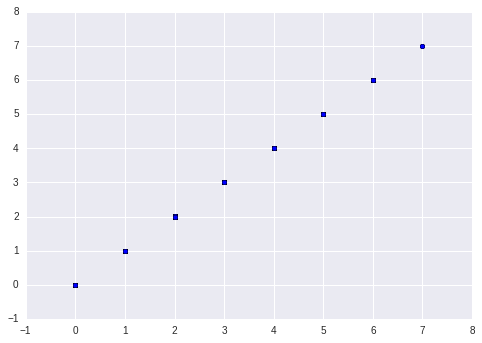

In [70]:
# Make cross validated predictions on the test sets
predictions = cross_val_predict(slr, X, y, cv=5)
plt.scatter(y, predictions)
plt.show()

In [71]:
# manually calcualte the r2
r2 = metrics.r2_score(y, predictions)
print ("Cross-Predicted R2:", r2)

Cross-Predicted R2: 0.999999999974


In [ ]:
# PCA to reduce dims, then look at random forest and also utilise XGBoost which is best predictor of batsman dismissal
# train it differently, best feature(s) to predict the outcomes